# 0 - Information

# 1 - Packages

In [1]:
%matplotlib  inline

# Mathematical packages
import numpy as np
from scipy.stats import norm, chi2

# Graphic packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import seaborn as sns
sns.set()

# Exercie 1

## Question 1.2

In [2]:
def generateX(n, p=np.array([0.25,0.25,0.5])):
    """Generate n samples a the discret law X following the p probabilities."""
    
    # Parameters
    k = len(p)
    
    # Saving samples
    samples = []
    
    # Generate each sample
    for i in range(n):
        
        # Generate a new sample of the uniform distribution
        u = np.random.uniform(0, 1)
        
        # Extract the corrsponding value of X:
        # Initiale value
        x = -1
        i = 0
        while x == -1:
            if u <= p[0:i+1].sum():
                x = i
            else:
                i += 1
                
        # Update the saving array
        samples.append(x)
        
    return samples

In [3]:
# Generate the samples
samples = generateX(100)

# Display them
samples

[2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2]

## Question 1.3

In [4]:
# Number of classes and number of samples
N = int(50)
n = 30

# Law on this distribution
p = np.array([1/N for i in range(N)])

# Generate the samples
samples = generateX(n, p=p)

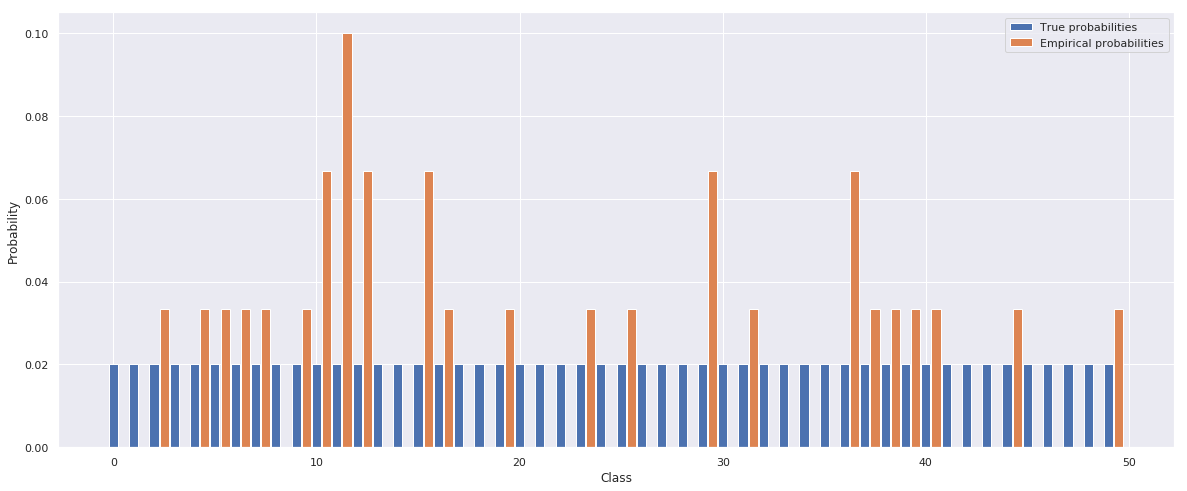

In [5]:
# Parameters of the figure
fig, ax = plt.subplots(figsize=(20,8))
plt.grid(True)
width = 0.45

# Values of the x array
X = np.array([i for i in range(N)])
Y = np.array([samples.count(i) for i in range(N)])
Y = Y / Y.sum()

# Display the two histogrammes
plt.bar(X, p, width=width, label="True probabilities")
plt.bar(X + 0.5, Y, width=width, label="Empirical probabilities")

# Legend
plt.legend()

# Labels of the axis
plt.xlabel("Class")
plt.ylabel("Probability")

# Save the figure
plt.savefig("Images/Histogramme.eps", bbox_inches='tight', pad_inches=0.0)

# Display the figure
plt.show()

# Exercise 2

## Question 2.2

### Generate the Z

In [6]:
# Number of class
K = 3

# Number of samples
n = 1000

# Generate the samples of Z
Z = generateX(n)

### Generate the Covariances matrices and mu

In [7]:
def generateRandomCovarianceMatrices(d=2, K=4):
    """Generate random covariance matrices."""
    
    # Initialisation of the random matrices
    cov = np.zeros((K, d, d))
    
    for k in range(K):
        P = np.random.rand(d, d)
        Q, R = np.linalg.qr(P)
        cov[k,:,:] = np.dot(Q, np.dot(np.diag(np.random.rand(d) +1 ), np.transpose(Q)))
        
    return cov

In [129]:
# Dimension of the x_i
d = 2

# Generate the covariances matrices
cov_x = 0.1 * generateRandomCovarianceMatrices(d=d, K=K)

# Generate the means: mu
mu_x = np.random.rand(K, d) * 4 - 1

In [130]:
mu_x

array([[ 1.8500726 , -0.64772811],
       [ 0.210644  ,  0.9592446 ],
       [ 2.22636877,  0.26826735]])

In [131]:
cov_x

array([[[ 0.12442987,  0.0294925 ],
        [ 0.0294925 ,  0.15894337]],

       [[ 0.16514987, -0.01643957],
        [-0.01643957,  0.15749557]],

       [[ 0.17763379, -0.01198542],
        [-0.01198542,  0.1891437 ]]])

### Generate the X

In [132]:
def generateGMM(Z, mu, cov):
    """Generathe the X according to a gaussian mixture model and the Z."""
    
    # Number of classes
    K = len(cov)
    
    # Number of samples to generate
    n = len(Z)
    
    # Saving array
    X = []
    
    # Generate each sample of X
    for i in range(n):
        
        # Extract associated gaussian
        k = Z[i]
        
        # Extract associated mu and covariance matrix
        mu_i = mu[k, :]
        cov_i = cov[k, :, :]
        
        # Generate a sample of X according to this gaussian
        x_i = np.random.multivariate_normal(mu_i, cov_i)
        
        # Update saving array
        X.append(x_i)
        
    return np.array(X)

In [133]:
# Generate the samples of X
X = generateGMM(Z, mu_x, cov_x)

# Display the result
X

array([[ 1.9823629 , -0.59680792],
       [ 1.08093544,  0.94520795],
       [ 1.48209012,  0.43620829],
       ...,
       [ 2.09013611,  0.41311928],
       [ 2.15168707, -1.01626802],
       [ 2.39440485,  0.53335681]])

## Question 2.3 

### Graphic functions

In [134]:
def attribute_clusters(q):
    """Attribute a cluster to each data point contain in gamma."""
    
    return np.argmax(q, axis=1)

In [135]:
def cov_ellipse(cov, q=None, nsig=None, **kwargs):
    """
    Parameters
    ----------
    cov : (2, 2) array
        Covariance matrix.
    q : float, optional
        Confidence level, should be in (0, 1)
    nsig : int, optional
        Confidence level in unit of standard deviations. 
        E.g. 1 stands for 68.3% and 2 stands for 95.4%.

    Returns
    -------
    width, height, rotation :
         The lengths of two axises and the rotation angle in degree
    for the ellipse.
    """

    if q is not None:
        q = np.asarray(q)
    elif nsig is not None:
        q = 2 * norm.cdf(nsig) - 1
    else:
        raise ValueError('One of `q` and `nsig` should be specified.')
    
    
    r2 = chi2.ppf(q, 2)

    val, vec = np.linalg.eigh(cov)
    width, height = 2 * np.sqrt(val[:, None] * r2)
    rotation = np.degrees(np.arctan2(*vec[::-1, 0]))

    return width, height, rotation

In [136]:
def ellipsoides(mu, cov, ax):
    """Display 90% of the mass of the gaussian distributions contain in mu and sigma2 """

    # Parameter
    K = len(cov)
    n, d = np.shape(X)
    
    # Clusters
    clusters = [i for i in range(K)]
    
    # Set of colors
    cmap = cm.get_cmap("tab10") #["orange", "red", "green", "blue"]
    colors = np.array([cmap(c) for c in clusters])
    
    # Add the ellipsoide for each gaussian        
    for k in range(K):
        width, height, rotation = cov_ellipse(cov[k,:,:], q=0.9)
        p = patches.Ellipse(xy=(mu[k,0], mu[k,1]),
                            width=width, height=height, angle=rotation, 
                            edgecolor=colors[k],
                            fill=False)
        ax.add_patch(p)

In [137]:
def scatter(X, clusters, K, label="Cluster ", s=20, alpha=1, marker="x", edgecolors="none"):
    """This function displays the points (x_i) contains in X.
       It also adapted the color of the point according to the cluster it belongs to."""
    
    # Set of colors
    cmap = cm.get_cmap("tab10") #["orange", "red", "green", "blue"]
    colors = np.array([cmap(c) for c in clusters])
    
    # Display the data for each cluster
    for k in range(K):
        
        # Extract the coordinates and colors
        X_k = X[np.where([clusters == k])[1], :]
        colors_k = colors[np.where([clusters == k])[1]]
        
        # Made the scatter plot
        plt.scatter(x=X_k[:,0], y=X_k[:,1], label=label + str(k), 
                    c=colors_k, alpha=alpha, marker=marker, s=s,
                    edgecolors=edgecolors)

In [138]:
def figure_EM(X, pi, cov, mu, q, ellipsoides_func=ellipsoides, name="EM_Isotropic"):
    """This functions display the data point, the cluster, and the parameters of
       the gaussians of the latent variables."""
    
    # Parameter
    K = len(cov)
    n, d = np.shape(X)
    
    # Parameters of the figure
    fig, ax = plt.subplots(figsize=(11, 11))
    plt.grid(True)
    
    # Set the axes
    ax.set_xlim(X[:,0].min() - 1, X[:,0].max() + 1)
    ax.set_ylim(X[:,1].min() - 1, X[:,1].max() + 1)
    ax.set_aspect(1.0)
    
    # Attribute a cluster to each data point and display the data
    clusters = attribute_clusters(q)
    scatter(X, clusters, K, alpha=0.6)
    
    # Display the mean of the gaussians
    clusters_mu = np.array([i for i in range(K)])
    scatter(mu, clusters_mu, K, label="Center ", marker="o", s=50,
            edgecolors="black")
    
    #  Display the ellipsoide of each cluster
    ellipsoides_func(mu, cov, ax)

    # Legend of the axes
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    
    # Display the legend
    plt.legend()
    
    # Save the fig
    plt.savefig("./Images/" + name, bbox_inches='tight', pad_inches=0.0)
    
    # Display the figure
    plt.show()

### Kmeans

We implement the Kmeans for a right initialisation of the EM

In [139]:
def norme(x,y):
    """This functions compute the norm L2 on the difference of x and y."""
    
    return np.sqrt(np.sum((x - y)**2))

In [140]:
def Kmeans(X, K=4, nb_iter=10):
    """This functions compute the K associated cluster to X according the K means 
       algorithm."""
    
    # Parameters
    n, d = np.shape(X)
    
    # Initialisation of the centroids
    centroids = np.random.normal(X.mean(axis=0), X.std(axis=0), size=(K, d))
    
    # Initialisation of the associated clusters
    clusters = np.zeros(n, dtype=int)
    
    # Execute the pre-defined number of iterations
    for t in range(nb_iter):
        
        # For each data, attach a cluster
        for i in range(n):
            
            # Initialisation of the distance and the associated cluster
            distance = float('inf')
            clust = 0
            
            for k in range(K):
                newdist = norme(centroids[k,:], X[i,:])
                if newdist < distance:
                    distance = newdist
                    clust = k
            
            # Update of the associated cluster
            clusters[i] = clust
        
        # Update of the centroids
        for k in range(K):
            centroids[k, :] = np.mean(X[np.where([clusters == k])[1], :], axis=0)
    
    # Return the result
    return centroids, clusters

### EM algorithm

In [141]:
def objectif(X, pi, cov, mu, q):
    """This function computes the complete-log-likelihood for the given parameters."""
    
    # Parameters
    K = len(pi)
    n, d = np.shape(X)
    
    # Initialisation of the value of the objectif function
    objectif = 0
    
    # Loop over each data point
    for i in range(n):
        for k in range(K):
            
            y = X[i,:] - mu[k,:]
            inv = np.linalg.inv(cov[k,:,:])
            
            objectif -= 0.5 * np.dot(y, np.dot(inv, y))
            objectif -= np.log(2 * np.pi * np.sqrt(np.linalg.det(cov[k,:,:])))
            objectif += np.log(pi[k])
            objectif *= q[i,k]
    
    return objectif

In [142]:
def Estep(X, pi, cov, mu):
    """This function executes the E step for general matrices"""
    
    # Parameters
    n, d = np.shape(X)
    K = len(pi)
    
    # Initialisation
    argexpo = np.zeros((n,K))
    
    for i in range(n):
        for k in range(K):
            
            y = X[i,:] - mu[k,:]
            inv = np.linalg.inv(cov[k,:,:])
            
            argexpo[i,k] -= 0.5 * np.dot(y, np.dot(inv, y))
            argexpo[i,k] += np.log(pi[k])
            argexpo[i,k] -= np.log(2 * np.pi * np.sqrt(np.linalg.det(cov[k,:,:])))
    
    # Computation of the max argexpo for each data point i
    maxi = np.tile(np.amax(argexpo, axis=1).reshape(n, 1), (1, K))
    
    # Computation of the logarithm of q_ik
    ln_q = argexpo - maxi
    ln_q -= np.tile(np.log(np.sum(np.exp(argexpo - maxi),axis=1).reshape(n, 1)), (1, K))
    
    return np.exp(ln_q)

In [143]:
def Mstep(X, pi, cov, mu, q):
    """This function executes the M step of the EM algorithm for general covariance
       matrices."""
    
    # Parameters
    K = len(pi)
    n, d = np.shape(X)
    
    # Estimator of mu_k
    for k in range(K):
        
        mu[k,:] = [0,0]
        
        for i in range(n):
            mu[k,:] += q[i,k] * X[i,:]
            
        mu[k,:] /= np.sum(q[:,k])
    
    # Estimator of sigma2_k
    for k in range(K):
        
        cov[k,:,:] = np.zeros((d,d))
        
        for i in range(n):
            
            y = (X[i,:] - mu[k,:]).reshape(d, 1)     
            cov[k,:,:] += q[i,k] * np.dot(y, y.T)

        cov[k,:,:] /= np.sum(q[:,k])
        
        # Regularisation for avoiding null matrices.
        cov[k,:,:] += 0.001 * np.eye(d)

    # Estimator of pi_k
    pi = np.sum(q, axis=0)
    pi /= np.sum(pi)
    
    # Return results
    return pi, cov, mu

In [144]:
def EM(X, K=3):
    """This function executes the EM algorithm."""
    
    # Parameters
    n, d = np.shape(X)
    
    # Initialisation of the latent probabilities
    q = np.random.rand(n, K) 
    for i in range(n):
        q[i,:] /= np.sum(q[i,:]) 
        
    # Initialisation of the parameters for the E step
    cov = generateRandomCovarianceMatrices(d, K)
    mu = Kmeans(X, K=K)[0]
    pi = np.random.rand(K)
    pi /= np.sum(pi)
    
    # Saving array of the log-likelihood
    log_likelihood_l = []
    
    # Initialisation of the objectif
    objectif_new = objectif(X, pi, cov, mu, q)
    objectif_old = 2 * objectif_new
    
    # Update the saving array of the log-likelihood
    log_likelihood_l.append(objectif_new)
    
    while abs((objectif_old - objectif_new) / objectif_old) > 10e-5:
        
        # E step
        q = Estep(X, pi, cov, mu)
        
        # M step
        pi, cov, mu = Mstep(X, pi, cov, mu, q)
        
        # Update of the objectif
        objectif_old = objectif_new
        objectif_new = objectif(X, pi, cov, mu, q)
        print(objectif_new)
        
        # Update the saving array of the log-likelihood
        log_likelihood_l.append(objectif_new)
        
    return pi, cov, mu, q, log_likelihood_l

In [145]:
# Execute the EM algorithm and compute the parameters
pi_em, cov_em, mu_em, q_em, log_likelihood_l = EM(X)

-1.9562613835678373
-1.8666039797641458
-1.7248484202226957
-1.5436603155289195
-1.3844373842119766
-1.2968170955040264
-1.2662361866477374
-1.2593348797323154
-1.261066829734953
-1.2659187216612624
-1.2715419501967067
-1.2766849050268576
-1.2805852894357526
-1.2827891864407064
-1.2831036335634
-1.281586561417295
-1.2785249445040074
-1.2743749178613264
-1.2696659465107205
-1.2648956322544256
-1.2604488822207225
-1.2565625861540626
-1.2533346508182288
-1.2507596804679675
-1.2487708482025406
-1.2472746455872117
-1.2461739796760014
-1.2453807066161635
-1.244820737448869
-1.244434772548472
-1.2441768828476056
-1.2440122946619072
-1.2439150998172273


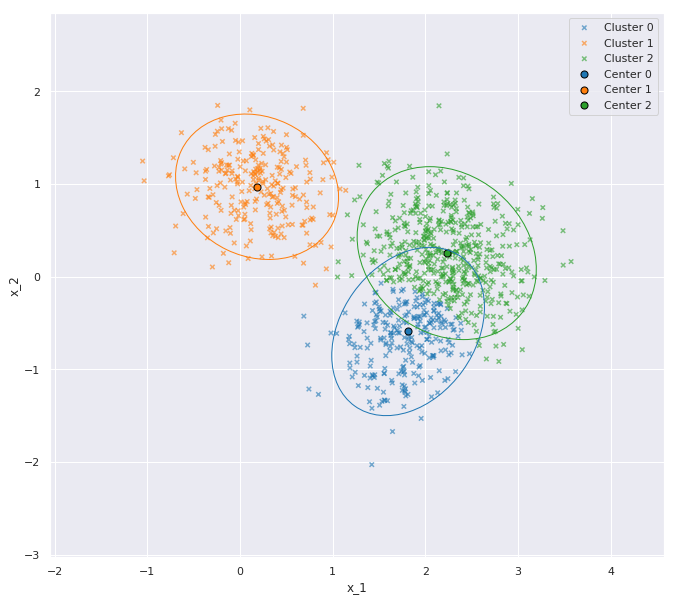

In [146]:
# Display the results
figure_EM(np.array(X), pi_em, cov_em, mu_em, q_em, name="EM_General")

### Display the log_likelihood over the iteration

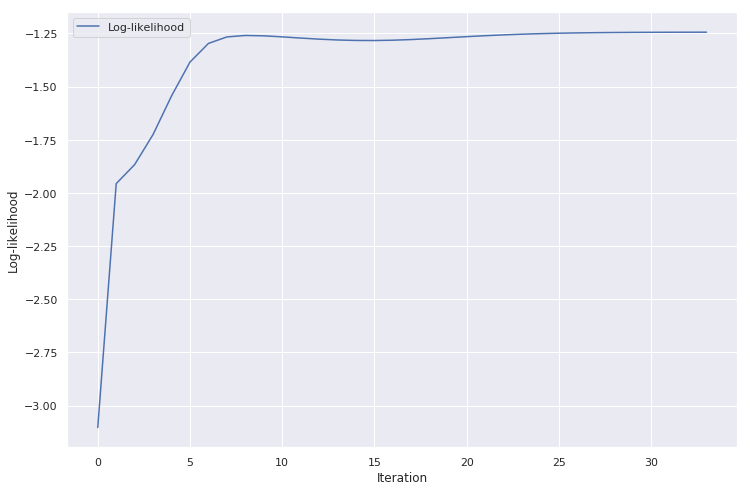

In [147]:
# Parameters of the figure
fig, ax = plt.subplots(figsize=(12,8))
plt.grid(True)

# Parameter
nb_iter = len(log_likelihood_l)

# Values of the x array
X = np.array([i for i in range(nb_iter)])

# Display the two histogrammes
plt.plot(X, log_likelihood_l, label="Log-likelihood")

# Legend
plt.legend()

# Labels of the axis
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")

# Save the figure
plt.savefig("Images/Log-likelihood.eps", bbox_inches='tight', pad_inches=0.0)

# Display the figure
plt.show()

## Question 2.4

In [149]:
# Comparison with the original parameters
# Comparison on the distribution of Z
print("True probability distribution of Z:, ", [0.25, 0.25, 0.5])
print("Approx. probability distribution of Z: ", pi_em)

# Comparison on the means mu
print("True means mu:, ", mu_x)
print("Approx. means mu: ", mu_em)

# Comparison on the covariance matrices
print("True covariance matrices: ", cov_x)
print("Approx. covariance matrices: ", cov_em)

True probability distribution of Z:,  [0.25, 0.25, 0.5]
Approx. probability distribution of Z:  [0.27319933 0.256038   0.47076267]
True means mu:,  [[ 1.8500726  -0.64772811]
 [ 0.210644    0.9592446 ]
 [ 2.22636877  0.26826735]]
Approx. means mu:  [[ 1.81580932 -0.59251285]
 [ 0.18586627  0.96917436]
 [ 2.23241909  0.25297606]]
True covariance matrices:  [[[ 0.12442987  0.0294925 ]
  [ 0.0294925   0.15894337]]

 [[ 0.16514987 -0.01643957]
  [-0.01643957  0.15749557]]

 [[ 0.17763379 -0.01198542]
  [-0.01198542  0.1891437 ]]]
Approx. covariance matrices:  [[[ 0.14742476  0.04664684]
  [ 0.04664684  0.17911968]]

 [[ 0.16804963 -0.02139762]
  [-0.02139762  0.13372223]]

 [[ 0.20301107 -0.03685601]
  [-0.03685601  0.18903531]]]


## Question 2.5

# Exercice 3